In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hdbscan
from sklearn.manifold import TSNE

### 데이터 살펴보기
- algo_df: 5개 알고 polar 카테별 점수
- nlp_df: 자연어처리를 통해 클러스터링한 label데이터

In [2]:
path = "../../datas/"
algo_df = pd.read_csv(path+"algo_df_max.csv")
algo_df = algo_df.loc[:,~algo_df.columns.str.match("Unnamed")]
nlp_df = pd.read_csv(path+"camp_description.csv")[['facltNm', 'labels']]
len(algo_df), len(nlp_df)

(2611, 1410)

In [3]:
algo_df.head()

,contentId,camp,comfort,together,fun,healing,clean
0,7934,좋은 카라반,34.6,11.1,7.0,10.0,0.0
1,7935,성주선바위캠핑장,55.8,35.4,23.5,26.8,39.9
2,7936,이화만리캠핑장,34.6,11.1,7.0,10.0,0.0
3,7939,하비오토캠핑장,39.4,15.9,8.8,17.3,0.0
4,7940,수림 휴원,34.6,11.1,7.0,10.0,0.0


In [4]:
nlp_df.drop_duplicates('facltNm', keep=False, inplace=True)
nlp_df.head()

,facltNm,labels
0,몽골캠핑장,14
1,고운마을캠핑장,-1
2,솔미캠핑장,10
3,강나루야영장,10
4,스카이랜드리조트,10


In [5]:
merge_df = pd.merge(algo_df, nlp_df, how="left", left_on="camp", right_on="facltNm")
merge_df.drop('facltNm', axis=1,inplace=True)
merge_df["labels"] = [str(int(r)) if np.isnan(r) == False else r for r in merge_df["labels"]]
merge_df = pd.get_dummies(merge_df, columns=['labels'], dummy_na=True)
merge_df.head()

,contentId,camp,comfort,together,fun,healing,clean,labels_-1,labels_0,labels_1,...,labels_15,labels_2,labels_3,labels_4,labels_5,labels_6,labels_7,labels_8,labels_9,labels_nan
0,7934,좋은 카라반,34.6,11.1,7.0,10.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,7935,성주선바위캠핑장,55.8,35.4,23.5,26.8,39.9,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,7936,이화만리캠핑장,34.6,11.1,7.0,10.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,7939,하비오토캠핑장,39.4,15.9,8.8,17.3,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,7940,수림 휴원,34.6,11.1,7.0,10.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
# 중복값 확인했으나 수가 적거나 영향이 작다고 판단, 우선 군집 진행
merge_df[merge_df[['camp']].duplicated()==True].sort_values("camp")['camp'].unique()

array(['느티나무 캠핑장', '늘푸른캠핑장', '두리캠핑장', '둥지캠핑장', '백운계곡캠핑장', '별빛야영장',
       '별헤는 밤', '산여울캠핑장', '소풍캠핑장', '솔바람 캠핑장', '솔밭야영장', '솔밭캠핑장', '포시즌',
       '포시즌 캠핑장'], dtype=object)

### 클러스터링

In [7]:
import camp_clustering as cc
ccl = cc.CampCluster()

In [8]:
# df = ccl.preprocessing()
# tsne_df = ccl.tsne_dm_reduction()

Cluster labels: 27 개
original data length: 2611 / clustering data length: 2611
cluster
-1     212
 0     283
 1     432
 2     134
 3      69
 4      32
 5     134
 6      41
 7      65
 8      38
 9      36
 10     51
 11     66
 12     91
 13     37
 14     93
 15     44
 16     64
 17    103
 18    100
 19     94
 20     72
 21     80
 22     42
 23     59
 24     47
 25     92
Name: contentId, dtype: int64
Condensed tree plot


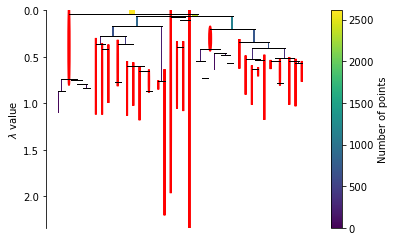

,contentId,camp,comfort,together,fun,healing,clean,cluster,x,y
0,7934,좋은 카라반,34.6,11.1,7.0,10.0,0.0,25,43.626575,-21.037521
1,7935,성주선바위캠핑장,55.8,35.4,23.5,26.8,39.9,1,-25.838428,2.415705
2,7936,이화만리캠핑장,34.6,11.1,7.0,10.0,0.0,24,46.043037,-27.644121
3,7939,하비오토캠핑장,39.4,15.9,8.8,17.3,0.0,5,21.672859,-15.103340
4,7940,수림 휴원,34.6,11.1,7.0,10.0,0.0,-1,49.371025,-22.872564


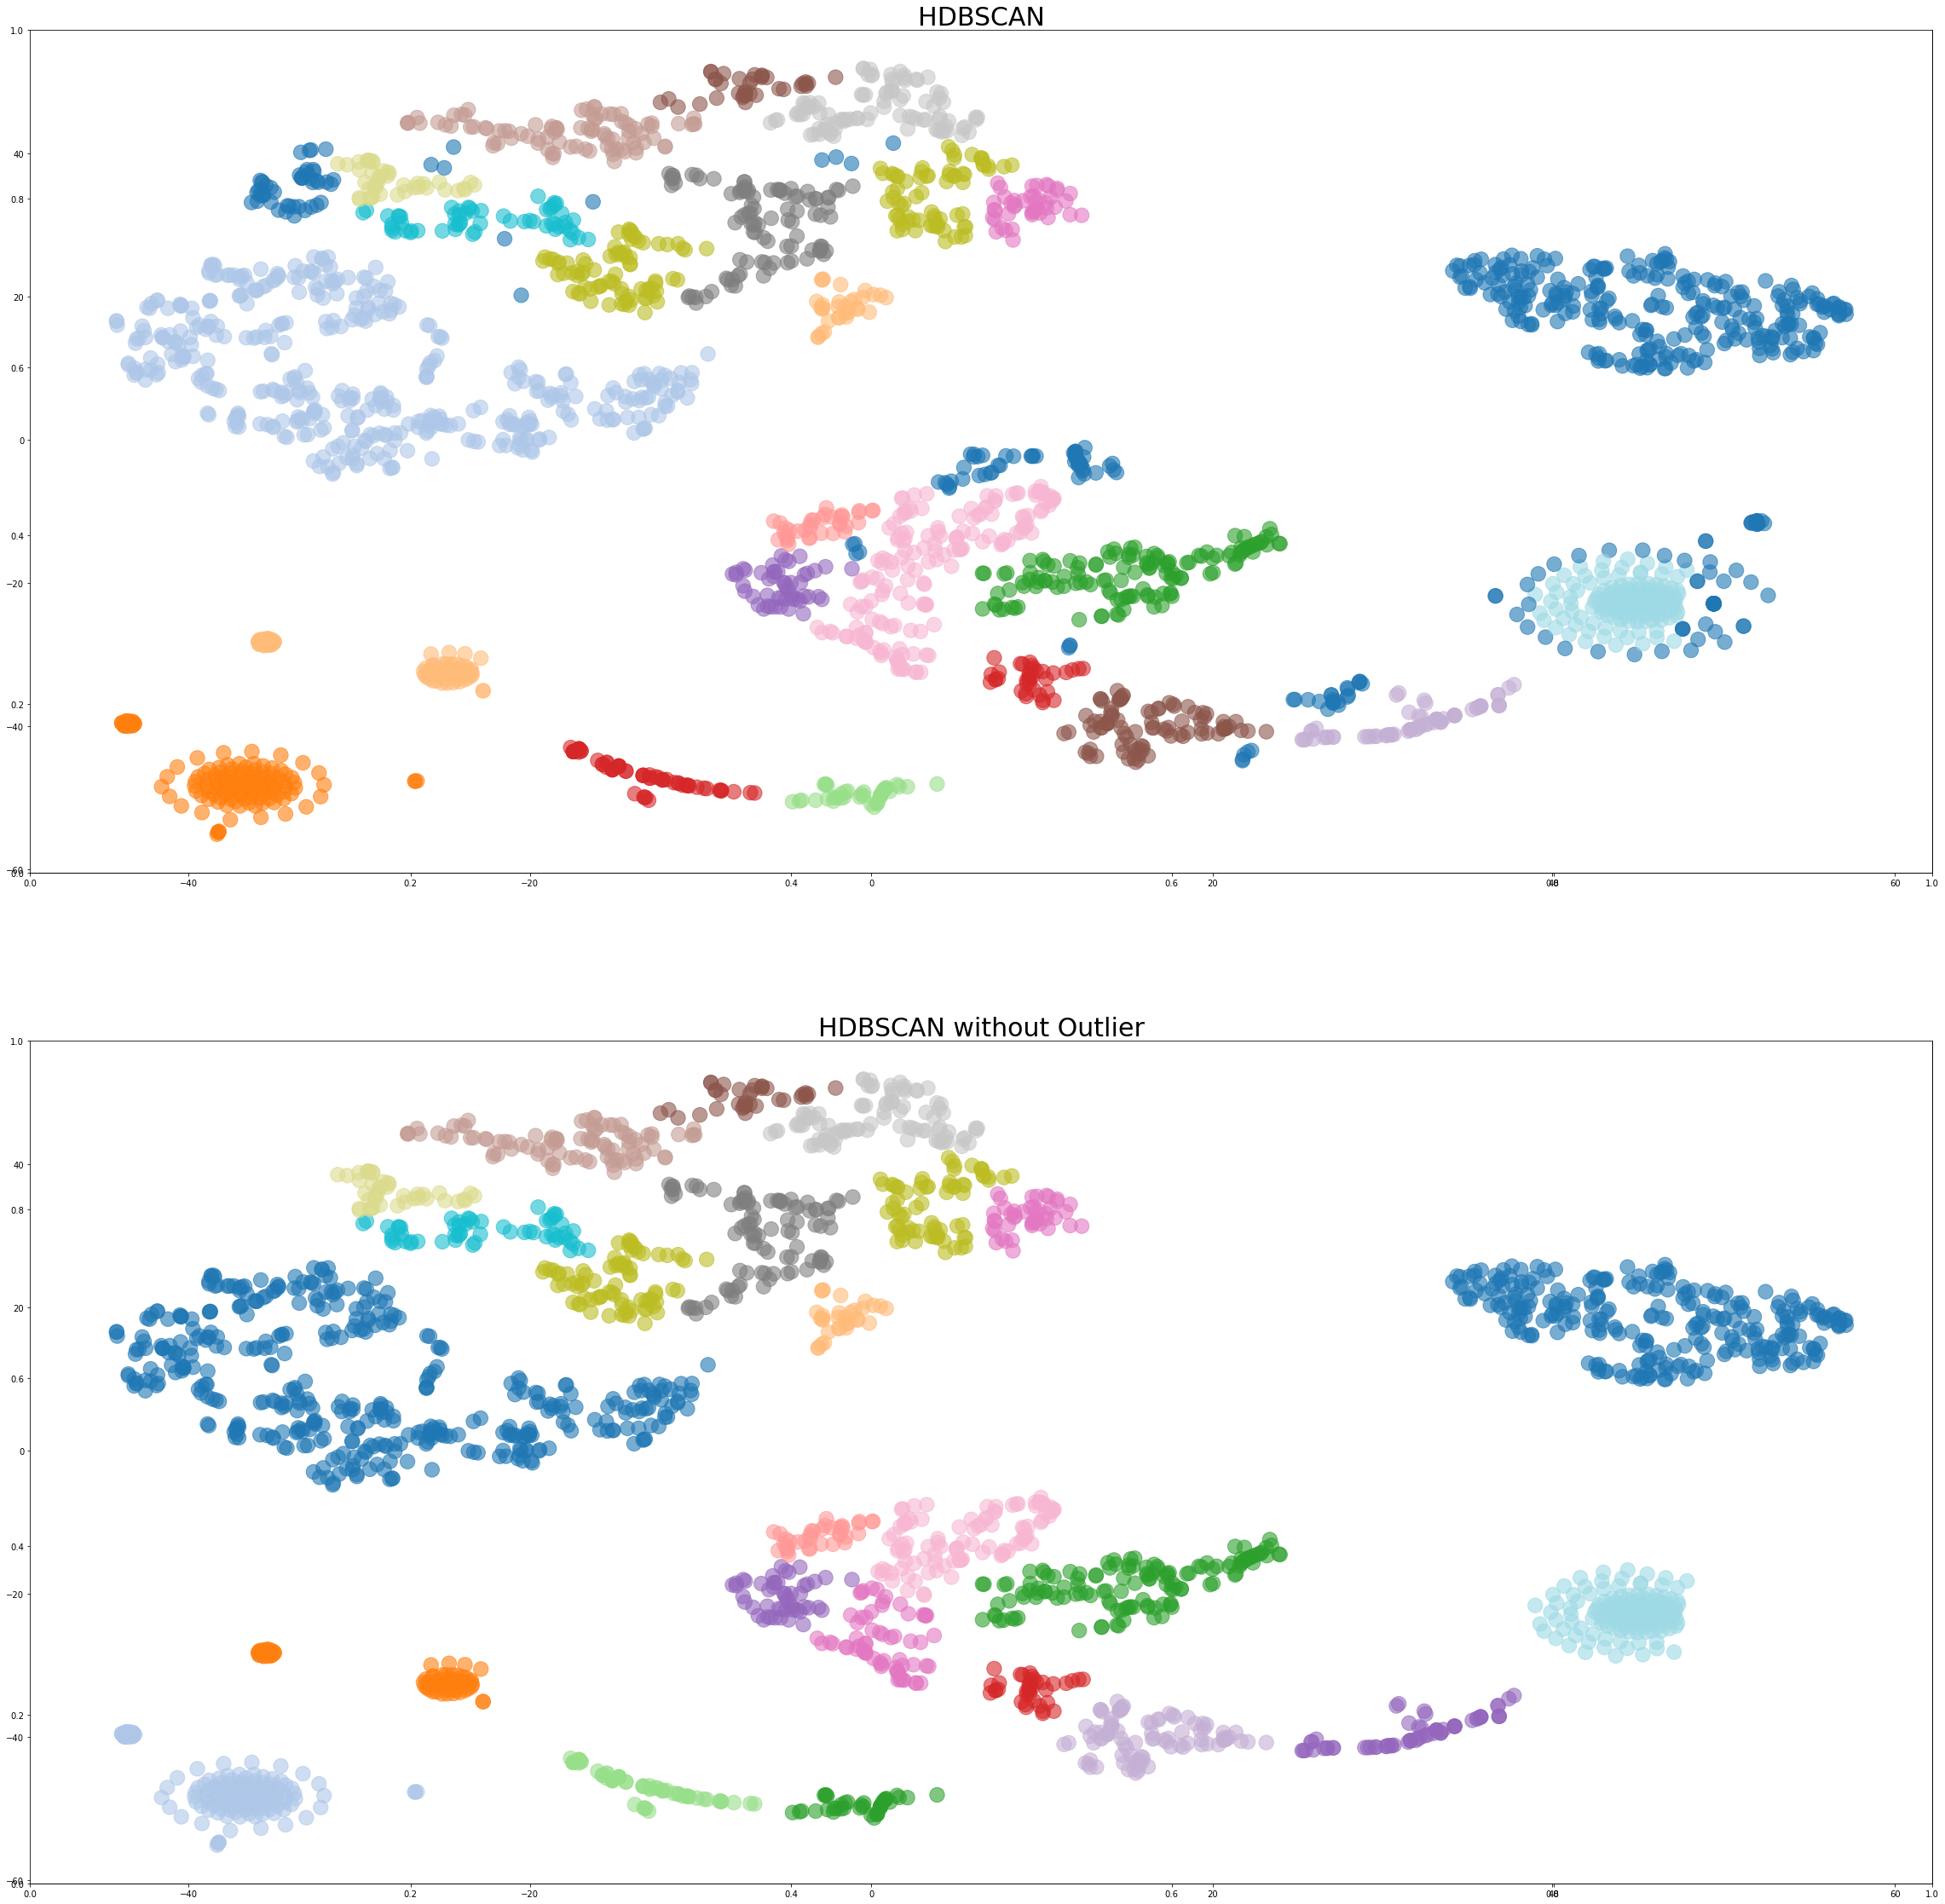

In [9]:
df = ccl.hdbscan_clustering(min_cluster_size=30, tsne=True)
df.head()

Dataframe Describe
         comfort   together        fun    healing      clean           x
count  26.000000  26.000000  26.000000  26.000000  26.000000   26.000000
mean   45.469295  35.436402  25.788396  26.191180  23.567314   92.269231
std     9.562658  17.008232  16.630090  19.333631  27.001254   85.775781
min    28.902239  11.100000   7.000000   0.000000   0.000000   32.000000
25%    38.723626  22.966102  13.003986   9.948901   0.021978   44.750000
50%    46.201298  37.747025  20.595611  25.283591   0.600228   67.500000
75%    50.572049  45.475951  39.672086  40.889758  49.788608   93.750000
max    65.928125  64.181818  58.429545  57.985106  86.828975  432.000000


,comfort,together,fun,healing,clean,x
cluster,,,,,,
-1,39.126415,20.240566,11.421698,23.408019,13.619811,212
0,63.057597,59.947350,41.386219,50.648057,86.828975,283
1,51.193981,36.013194,19.966898,22.191435,41.393287,432
2,28.902239,11.202985,7.000000,0.000000,0.000000,134
3,29.720290,11.100000,7.000000,0.000000,0.000000,69
4,65.928125,60.784375,54.159375,30.984375,34.815625,32
5,43.033582,26.973881,13.510448,20.314179,0.414179,134
6,36.987805,22.917073,13.675610,0.363415,0.000000,41
7,32.272308,11.456923,7.201538,0.052308,0.123077,65


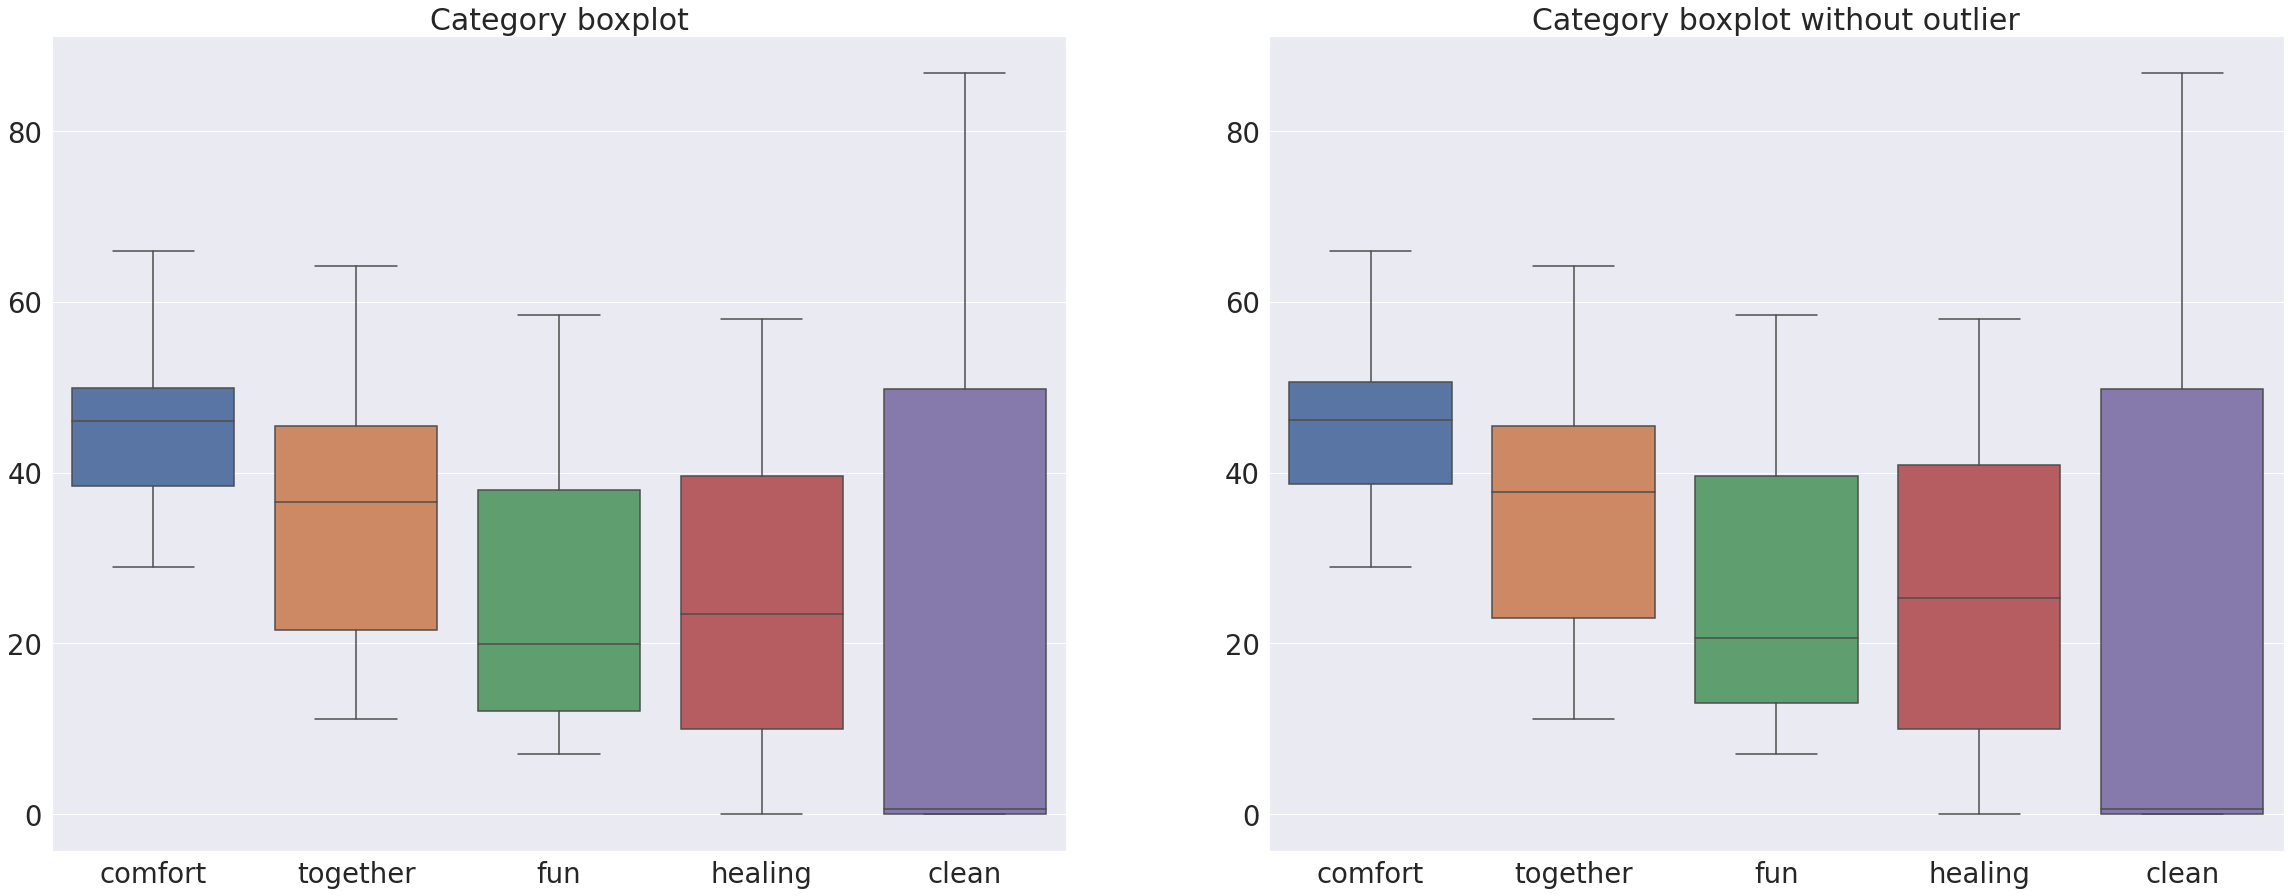

In [10]:
pv = ccl.cluster_eda(df)
pv

Cluster labels: 22 개
original data length: 2611 / clustering data length: 2611
cluster
-1      87
 0     283
 1     150
 2     438
 3     212
 4      50
 5     441
 6      41
 7      65
 8      66
 9      95
 10     38
 11     36
 12     85
 13     38
 14     91
 15     58
 16     59
 17     79
 18     46
 19     96
 20     57
Name: contentId, dtype: int64
Condensed tree plot


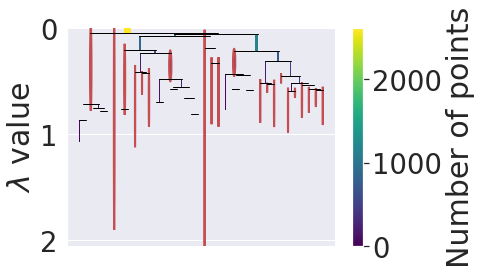

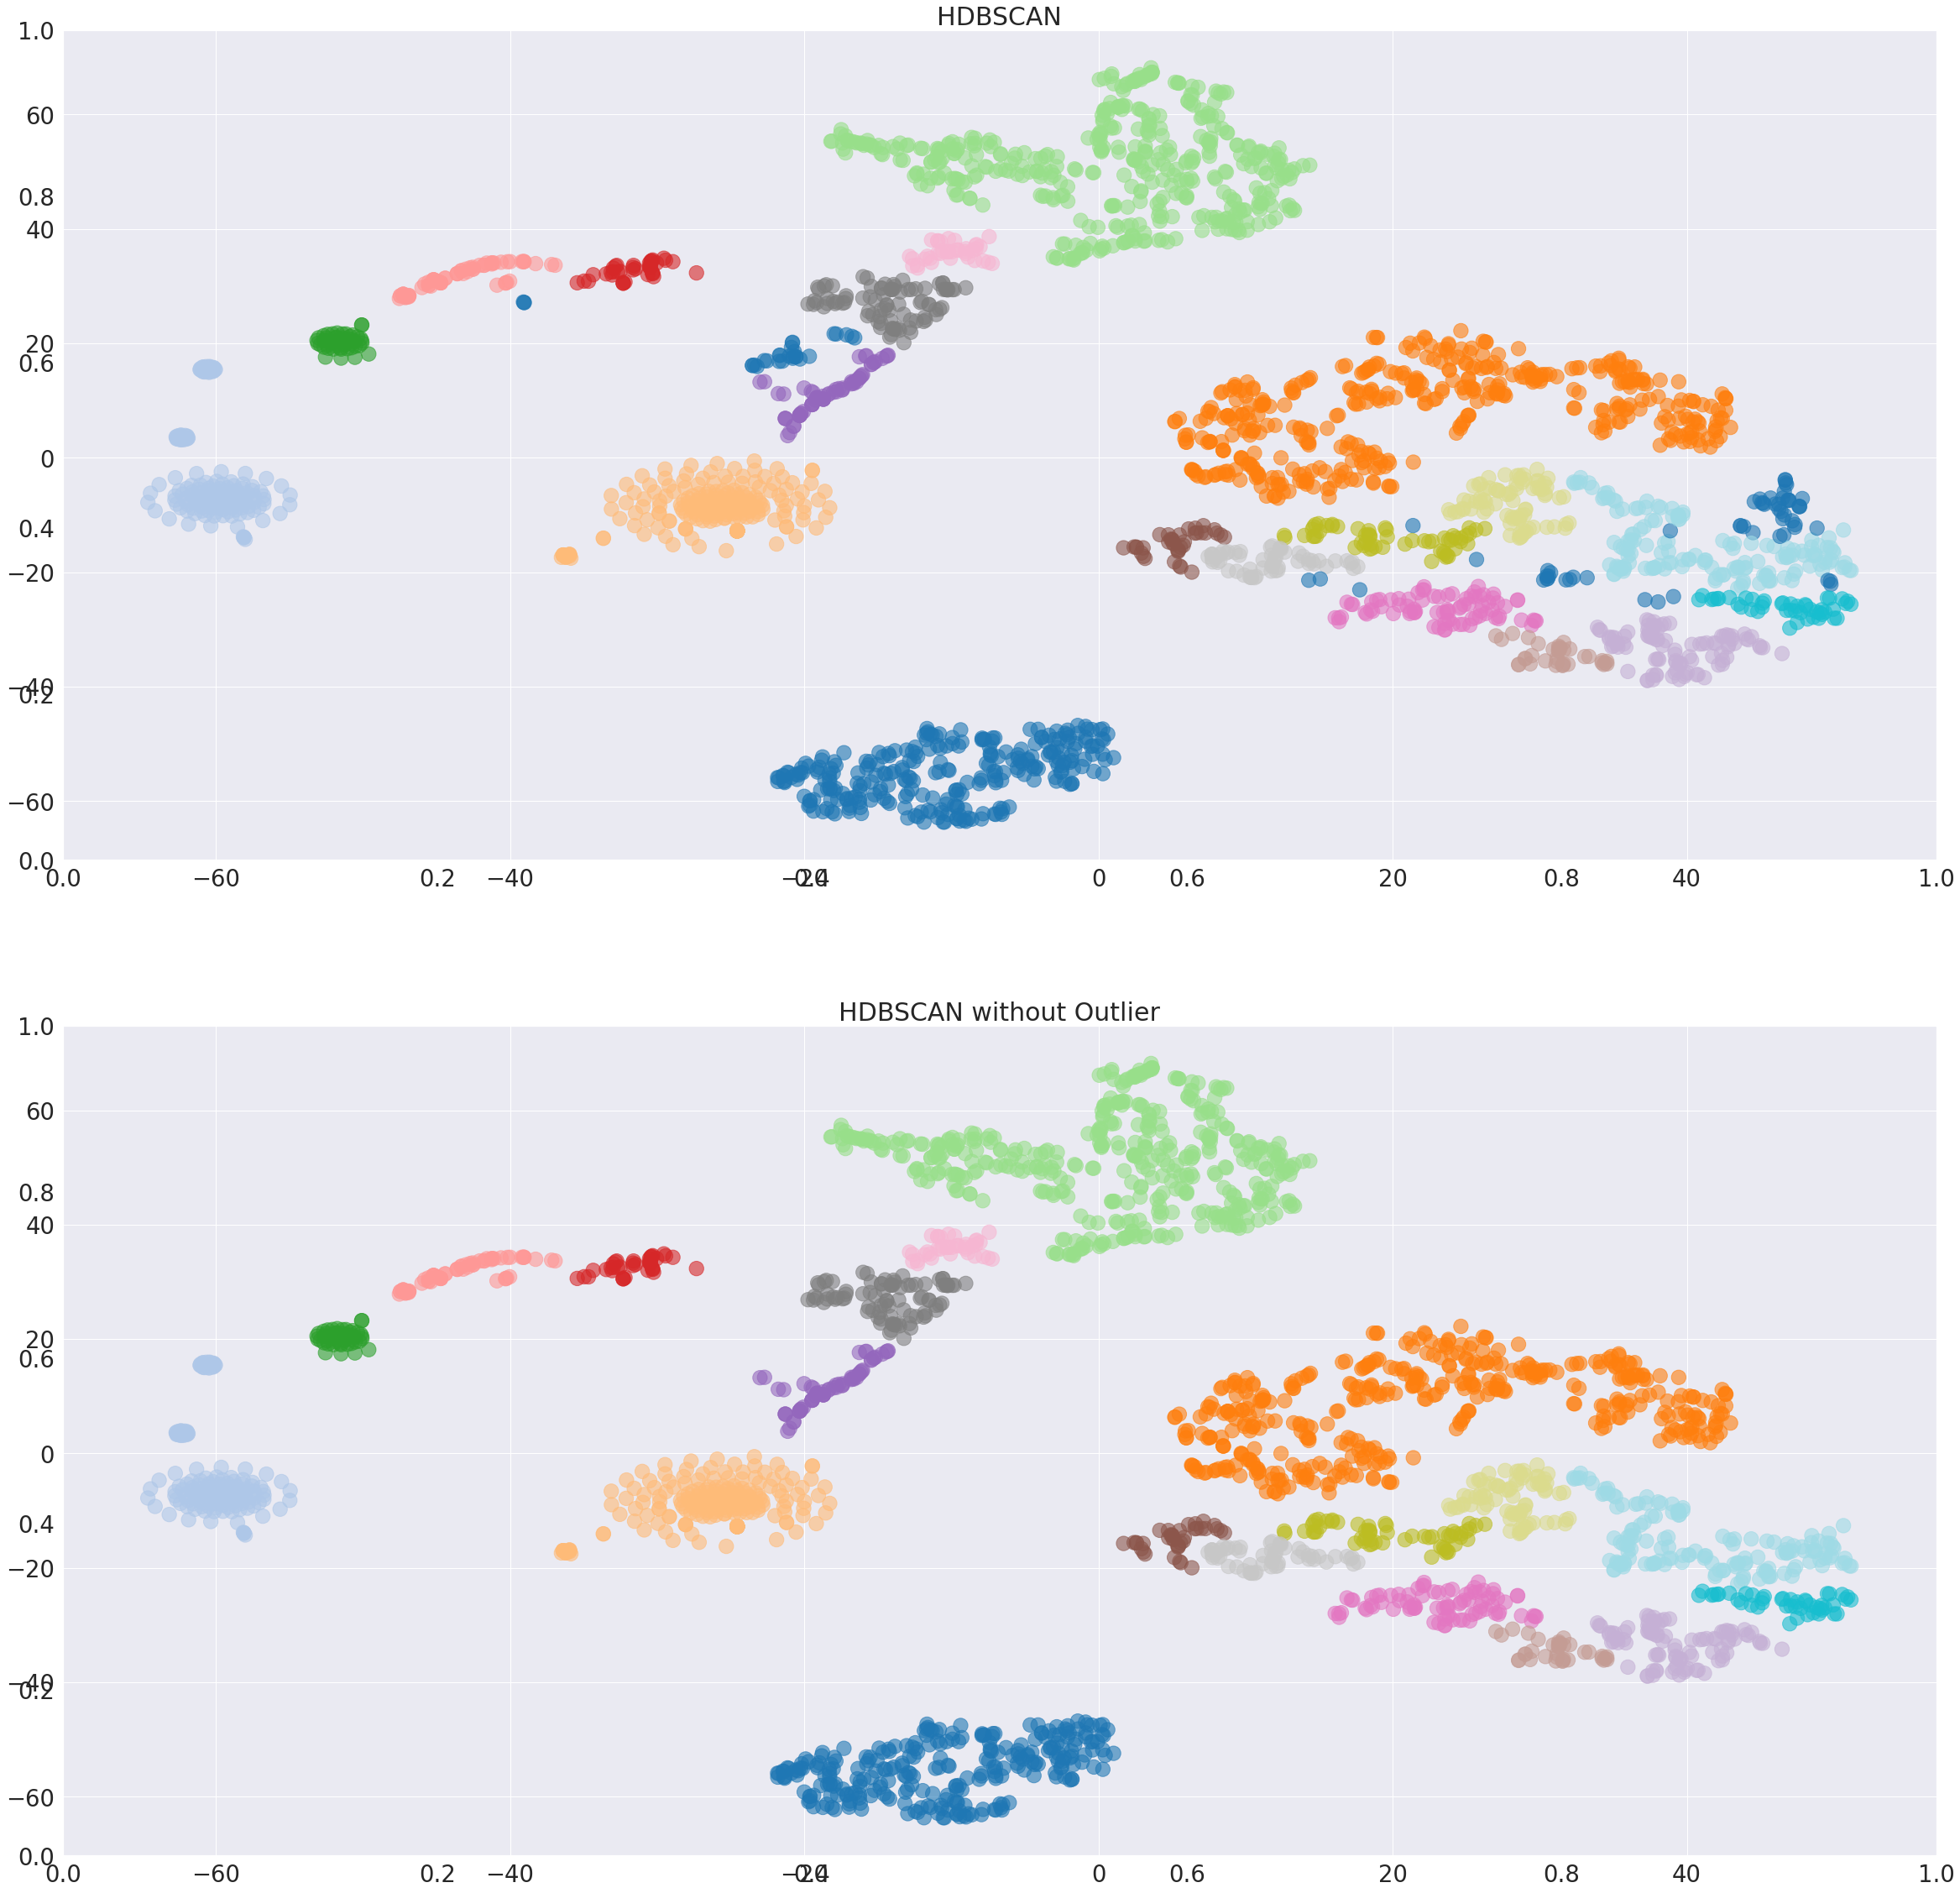

In [11]:
df2 = ccl.hdbscan_clustering(min_cluster_size=35, tsne=True)

Dataframe Describe
         comfort   together        fun    healing      clean           x
count  21.000000  21.000000  21.000000  21.000000  21.000000   21.000000
mean   44.524344  34.154875  23.460699  26.720526  29.864202  120.190476
std     9.077399  16.832859  15.432153  20.571727  27.673182  122.401233
min    28.964000  11.100000   7.000000   0.000000   0.000000   36.000000
25%    37.800000  22.917073  12.835165   9.856061   0.087912   50.000000
50%    46.289831  36.043379  20.028311  27.323810  48.705263   66.000000
75%    48.660759  45.183158  32.246316  42.062353  49.993671   96.000000
max    63.057597  60.333333  58.289474  58.043158  86.828975  441.000000


,comfort,together,fun,healing,clean,x
cluster,,,,,,
-1,50.964368,42.059770,35.026437,27.283908,27.895402,87
0,63.057597,59.947350,41.386219,50.648057,86.828975,283
1,28.964000,11.100000,7.000000,0.000000,0.000000,150
2,51.214384,36.043379,20.028311,22.100913,41.183333,438
3,34.276415,11.100000,7.000000,9.991509,0.000000,212
4,29.804000,11.100000,7.000000,0.000000,0.000000,50
5,45.414966,33.528798,23.210431,27.323810,0.327664,441
6,36.987805,22.917073,13.675610,0.363415,0.000000,41
7,32.272308,11.456923,7.201538,0.052308,0.123077,65


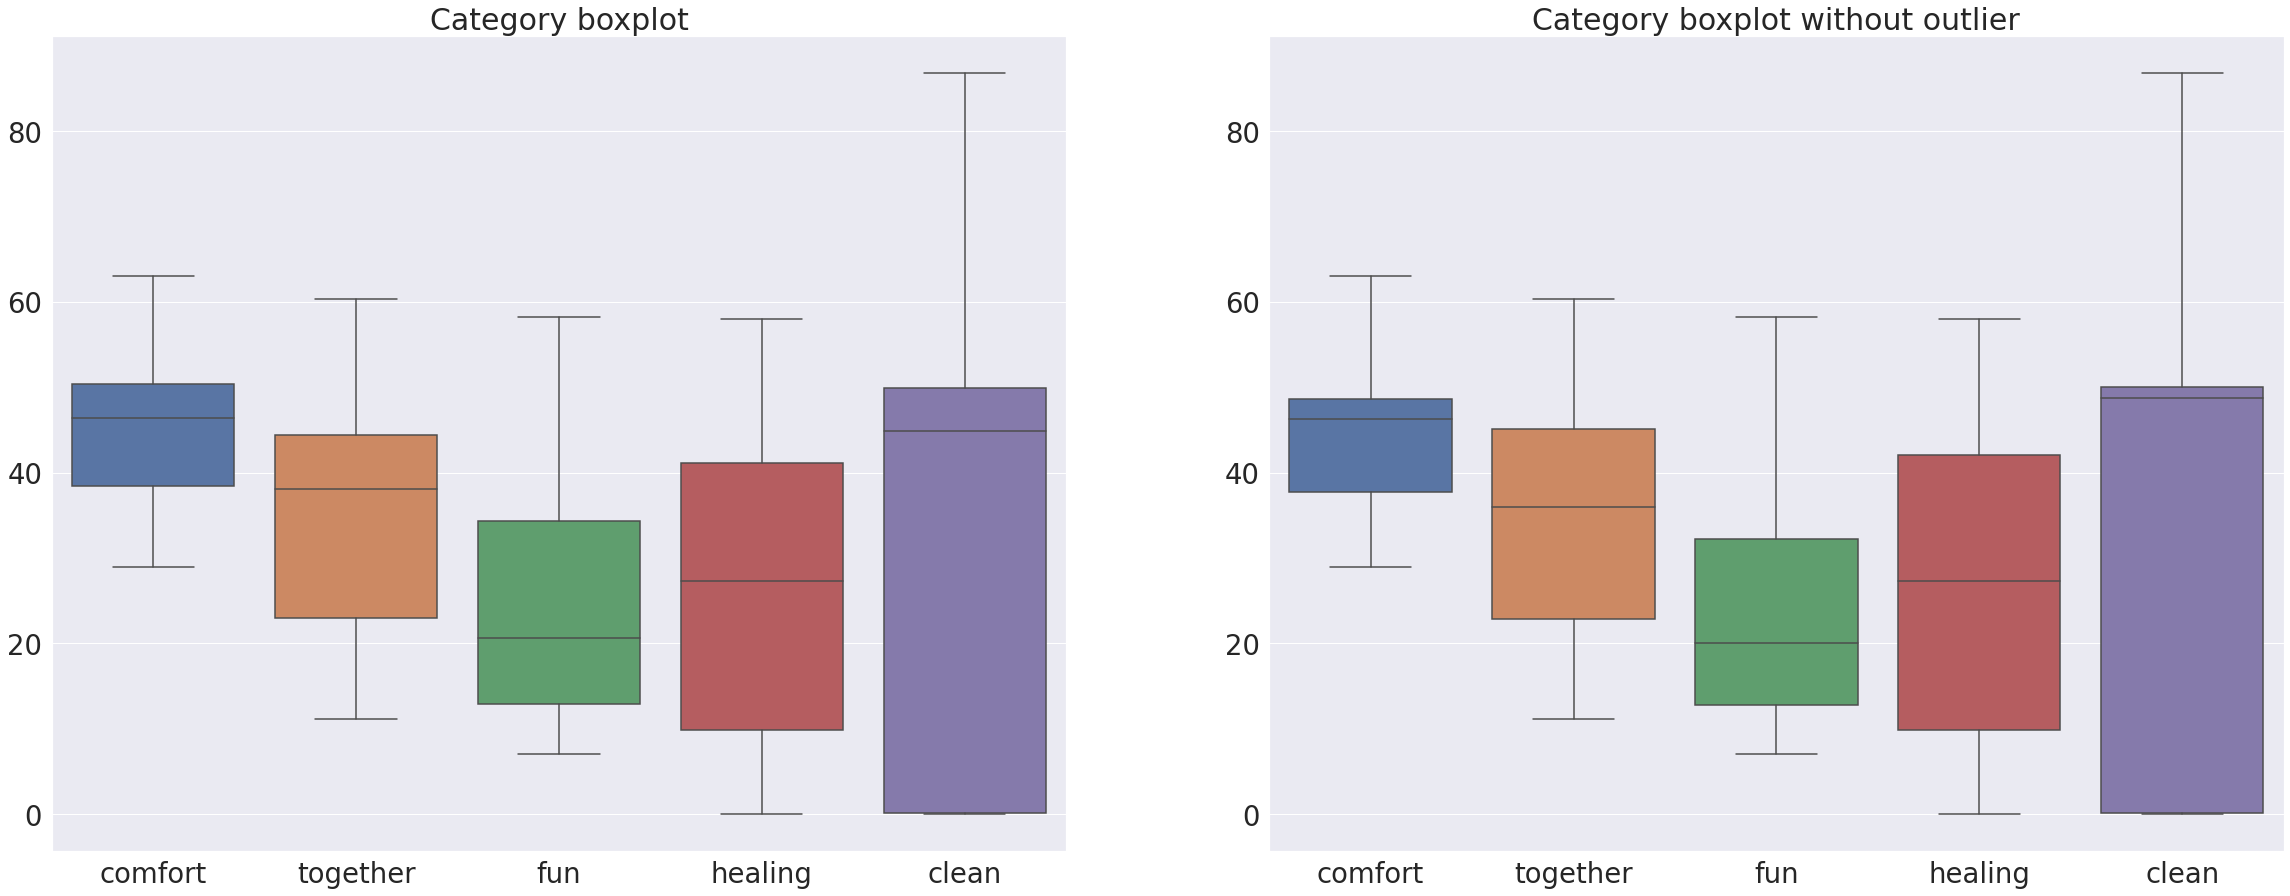

In [12]:
pv2 = ccl.cluster_eda(df2)
pv2

In [13]:
ccl.export_result(df)
ccl.export_result(df2)

Report has Saved!
Report has Saved!
